In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

**(0) read in the iris dataset**

In [2]:
from sklearn.datasets import load_iris
# (0) read in the iris data
iris = load_iris()
df=pd.DataFrame(iris['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
df['Species']=iris['target']
df.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**(1) create X (features) and y (response) (4 points)**

In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=25)

**(2) 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter), scoring is 'accuracy' (8 points)**

In [5]:
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10, scoring='accuracy')
accuracies_knn

array([0.92857143, 1.        , 1.        , 1.        , 1.        ,
       0.91666667, 1.        , 0.90909091, 1.        , 1.        ])

In [6]:
y_preds_knn=knn.predict(X_test)

**(3) use average accuracy as an estimate of out-of-sample accuracy (4 points)**

In [7]:
print("Accuracy  rounded up to integer: ","{:.0%}".format(accuracy_score(y_test, y_preds_knn)))

Accuracy  rounded up to integer:  93%


**(4) search for an optimal value of K for KNN (20 points)**<br>
**(5) plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis) (6 points) -- Thrid Chart**

**2 options** here: Either use **accuracy score** or **F1-Score**, I used both

In [8]:
def choose_best_K(dataframe):
    
    #Split data
    X=dataframe.iloc[:,:-1]
    y=dataframe.iloc[:,-1]
    
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=25)
    
    accuracy_score_=[]
    f1_score_=[]
    cross_val_score_=[]
 
    
    #Loop over the range to train the model
    for k in range(1,50):
        knn=KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
        knn.fit(X_train,y_train)
        y_preds=knn.predict(X_test)
        
        accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
        accuracy_score_.append(accuracy_score(y_test, y_preds))
        f1_score_.append(accuracy_score(y_test, y_preds))
       
            
    #Visualization 
    
    fig=plt.figure(figsize=(14,8))
    
    ax1=fig.add_subplot(3,1,1)
    ax2=fig.add_subplot(3,1,2)
    ax3=fig.add_subplot(3,1,3)
    
    #Accuracy Score
    ax1.plot(range(1,50),accuracy_score_,'o--')
    ax1.set_xlabel("Number of K")
    ax1.set_ylabel("Accuracy Score")
    ax1.set_title("Accuracy Score Method")
    ax1.text(8,0.98,"Best: 14")
    
    #F1
    ax2.plot(range(1,50),f1_score_,'o--')
    ax2.set_xlabel("Number of K")
    ax2.set_ylabel("F1 Score")
    ax2.set_title("F1 Score Method")
    ax2.text(8,0.98,"Best: 14")
    
    #Cross validated Score
    ax3.plot(range(1,11),accuracies_knn,'ro-')
    ax3.set_xlabel("Number of Fold")
    ax3.set_ylabel("Cross vlidated Score")
    ax3.set_title("Cross vlidated Score")
    
    plt.tight_layout()
    
    print(accuracies_knn)

[0.71428571 1.         0.75       1.         0.91666667 0.91666667
 0.91666667 0.81818182 0.90909091 1.        ]


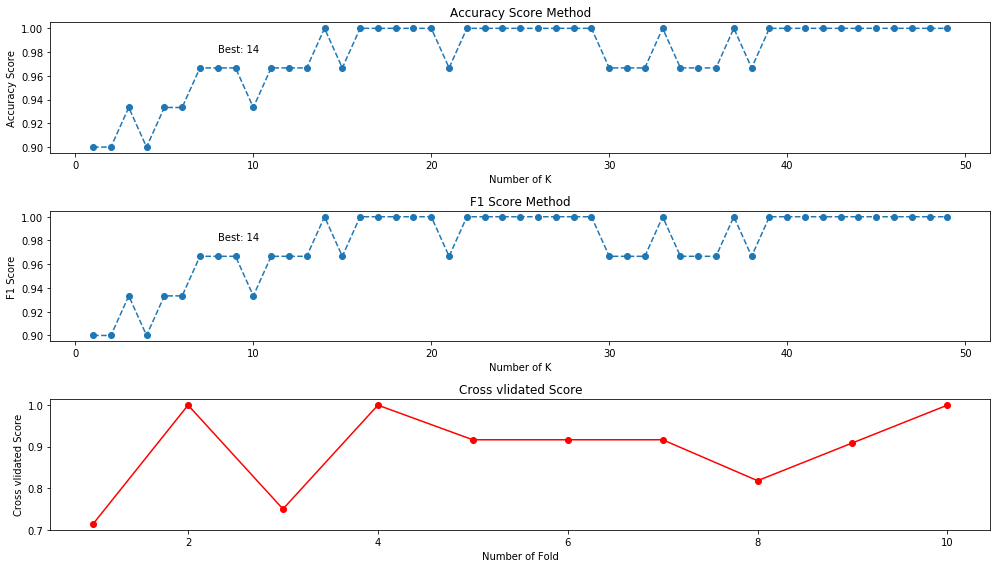

In [9]:
choose_best_K(df)

First point reached 100% accuracy in both Accuracy & F1 Score is 14, so 14 should be the optimal value for number of K 

**(1) 10-fold cross-validation with the best KNN model, scoring is 'accuracy' (6 points)**<br>
**(2) 10-fold cross-validation with logistic regression, scoring is 'accuracy' (6 points)**

In [10]:
def compare_model(dataframe):
  
    X=dataframe.iloc[:,:-1]
    y=dataframe.iloc[:,-1]
    
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=25)   
    
    knn=KNeighborsClassifier(n_neighbors=14, metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    knn_y_preds=knn.predict(X_test)
    
    lg=LogisticRegression()
    lg.fit(X_train,y_train)
    lg_y_preds=lg.predict(X_test)
    
    knn_accuracies=cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
    lg_accuracies=cross_val_score(estimator=lg, X=X_train, y=y_train, cv=10, scoring='accuracy')
    
    print("Max Accuracy for both models:")
    print("MAX KNN: ",knn_accuracies.max())
    print("MAX Logistic Regression: ",lg_accuracies.max())
    print("\n")
    print("Average Accuracy for both models:")
    print("KNN: ",np.mean(knn_accuracies))
    print("Logistic Regression: ",np.mean(lg_accuracies))
    print("\n")
    
    if knn_accuracies.max() > lg_accuracies.max():
        print("Conclusion: KNN outperforms Logistic Regression")
        
    elif knn_accuracies.max() == lg_accuracies.max():
        if np.mean(knn_accuracies)>np.mean(lg_accuracies):
            print("Conclusion: KNN outperforms Logistic Regression")
        elif np.mean(knn_accuracies)==np.mean(lg_accuracies):
            print("Conclusion: Tie")
        else:
            print("Conclusion: Logistic Regression outperforms KNN") 
    else:
        print("Conclusion: Logistic Regression outperforms KNN")

In [11]:
compare_model(df)

Max Accuracy for both models:
MAX KNN:  1.0
MAX Logistic Regression:  1.0


Average Accuracy for both models:
KNN:  0.9742424242424242
Logistic Regression:  0.9484848484848485


Conclusion: KNN outperforms Logistic Regression


**(0) read in the advertising dataset**

In [12]:
# (0) read in the advertising dataset
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**(1) create a Python list of three feature names: TV, radio, newpaper (5 points)**

In [13]:
feature_list=["TV","Radio","Newspaper"]

**(2) use the list to select a subset of the DataFrame (X) (5 points)**

In [14]:
X=data[feature_list]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


**(3) select the sales column as the response (y) (5 points)**

In [15]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

**(4) 10-fold cross-validation with all three features, scoring is 'neg_mean_squared_error' (6 points)**

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=25)

In [17]:
accuracies_nmse=cross_val_score(estimator = LinearRegression(), X=X, y=y, cv = 10,scoring='neg_mean_squared_error')
accuracies_nmse

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

**(5) fix the sign of MSE scores (5 points)**

In [18]:
accuracies_mse = -1*cross_val_score(estimator = LinearRegression(), X=X, y=y, cv = 10, scoring="neg_mean_squared_error")
accuracies_mse

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

**(6) convert from MSE to RMSE (5 points)**

In [19]:
accuracies_rmse=np.sqrt(-1*cross_val_score(estimator = LinearRegression(), X=X, y=y, cv = 10,scoring='neg_mean_squared_error'))
accuracies_rmse

array([1.88689808, 1.81595022, 1.44548731, 1.68069713, 1.14139187,
       1.31971064, 2.85891276, 1.45399362, 1.7443426 , 1.56614748])

**(7) calculate the average RMSE (5 points)**

In [20]:
np.mean(accuracies_rmse)

1.6913531708051792

**(8) 10-fold cross-validation with two features (excluding Newspaper), scoring is'neg_mean_squared_error' (10)**

In [21]:
accuracies_nmse=cross_val_score(estimator = LinearRegression(), X=X.drop('Newspaper',axis=1), y=y, cv = 10,scoring='neg_mean_squared_error')
accuracies_nmse

array([-3.38264572, -3.28736055, -2.09185507, -2.81784389, -1.27311083,
       -1.74391853, -8.0006111 , -2.07650936, -3.03635301, -2.4289835 ])